In [14]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'
from corner import corner
from tqdm import tqdm
# import emcee
from eryn.backends import HDFBackend
import pickle

from Triangle_BBH.Utils import ParamArr2ParamDict, ParamDict2ParamArr
from Triangle.Constants import *

### set label and truths

In [15]:
labels = [
    'log_chirp_mass',
    'mass_ratio',
    'spin_1z',
    'spin_2z',
    'coalescence_time',
    'coalescence_phase',
    'log_luminosity_distance',
    'cos_inclination',
    'longitude',
    'sin_latitude',
    'psi'
    ]

truths =  [6.0,
  0.3640815267051051,
  0.7899406190510447,
  0.015424596359292053,
  7.921580600701215,
  3.2535342675592966,
  4.415315985574876,
  0.12099051934668249,
  3.032776598141215,
  -0.9252889758070999,
  0.2409146690555858]

### Load raw samples

In [17]:
reader = HDFBackend('MCMCResults/HetLogLike.h5', read_only=True)
samples = reader.get_chain(discard=0, thin=1)
raw_sample = samples['model_0'][:, :, :, 0, :]
nstep = raw_sample.shape[0]
ntemp = raw_sample.shape[1]
nwalker = raw_sample.shape[2]
ndim = raw_sample.shape[3]
print(nstep, ntemp, nwalker, ndim)
raw_sample = None

2000 10 200 11


### Monitor progress

chain generated.


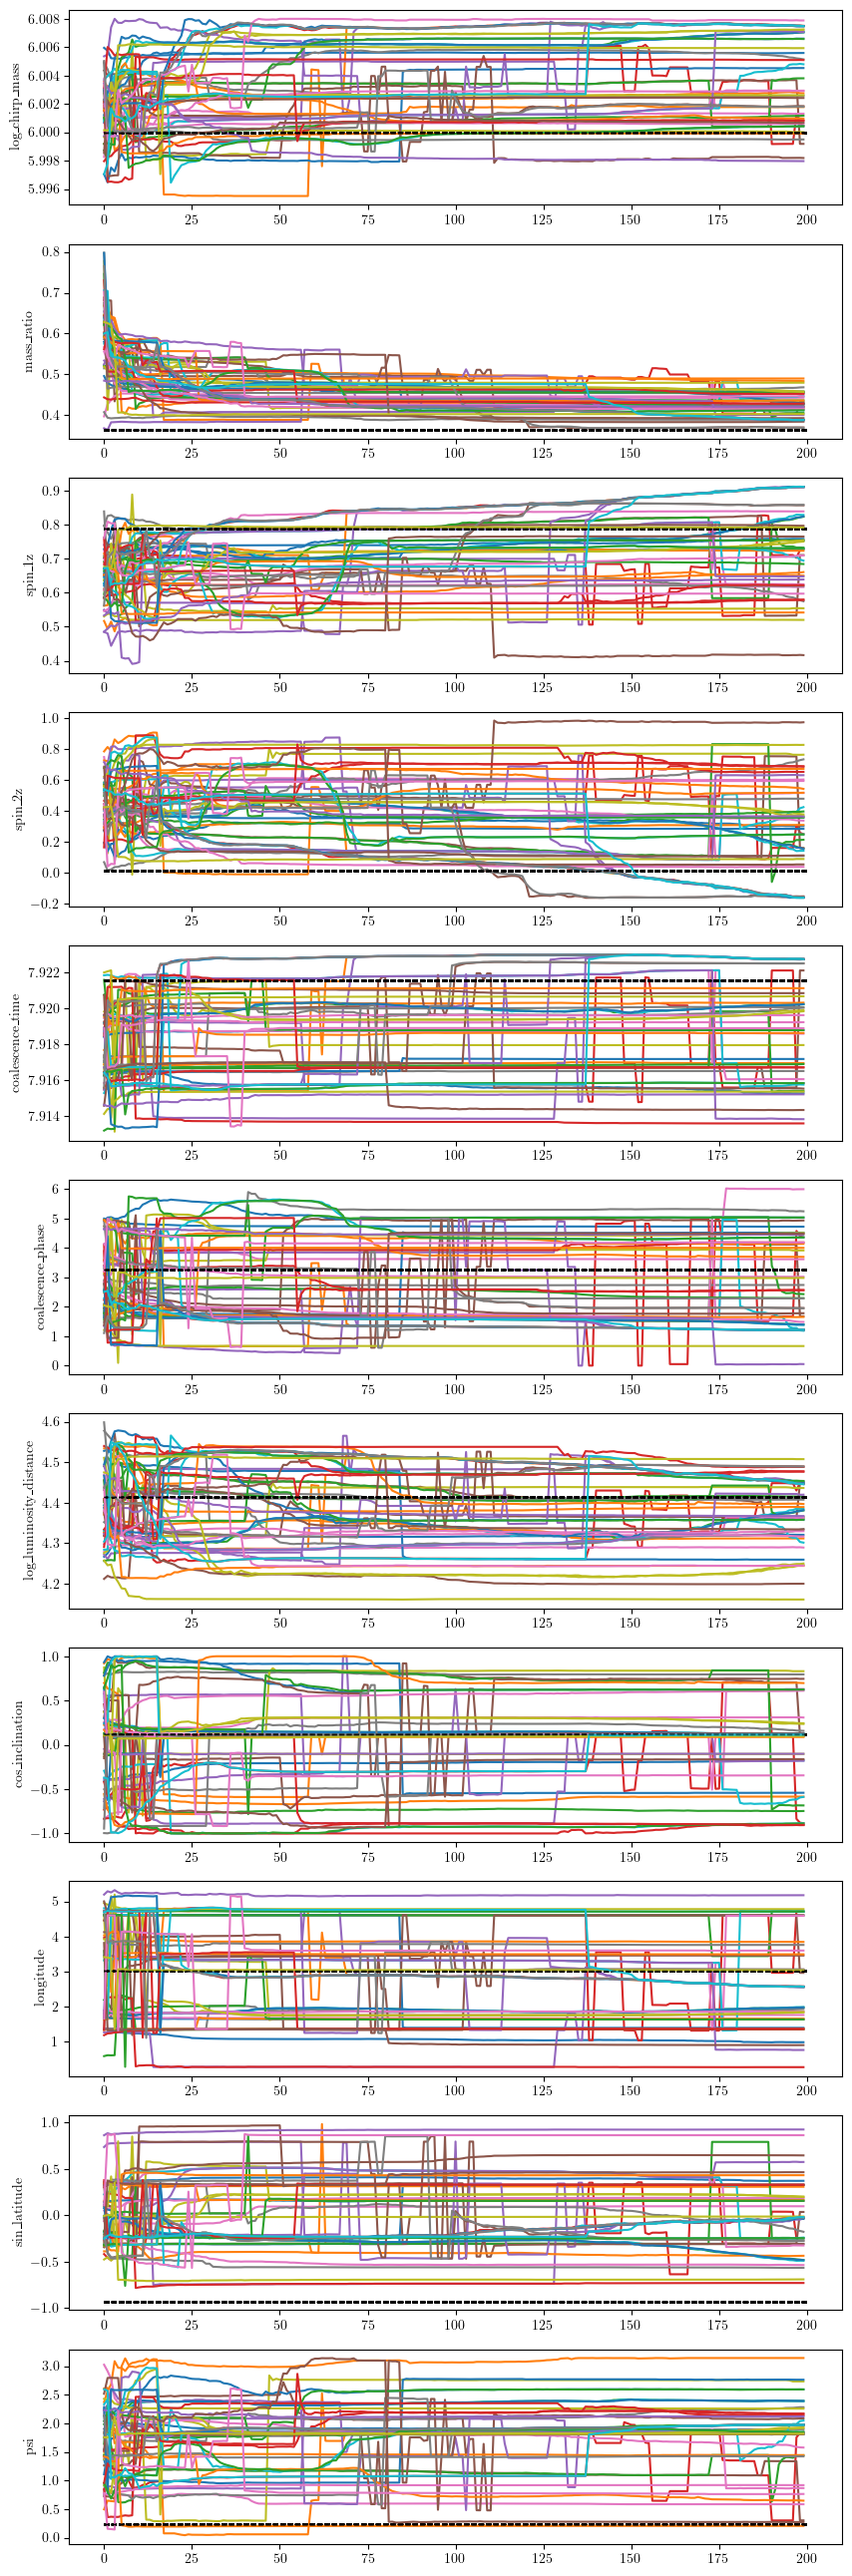

In [18]:
thin = 10
burnin = 0
plot_nwalker = 50
len_chain = len(reader.get_chain(thin=thin, discard=burnin)['model_0'][:, 0, 0, :, 0])
print('chain generated.')

fig, ax = plt.subplots(ndim, 1)
fig.set_size_inches(10, 3*ndim)
for i in range(ndim):
    for walk in range(plot_nwalker):
    # for walk in range(nwalker):
        ax[i].plot(reader.get_chain(thin=thin, discard=burnin)['model_0'][:, 0, walk, 0, i])
        ax[i].hlines(truths[i], 0, len_chain, color='k', linestyle='--', linewidth=1, alpha=0.5)

    ax[i].set_ylabel(labels[i])
# plt.savefig('MCMC_results/progress_inspiral_notemp.jpg')

### Corner

burnin, thin = 1000 10
flatten burned sample = (20000, 11)
final sample size =  (20000, 11)


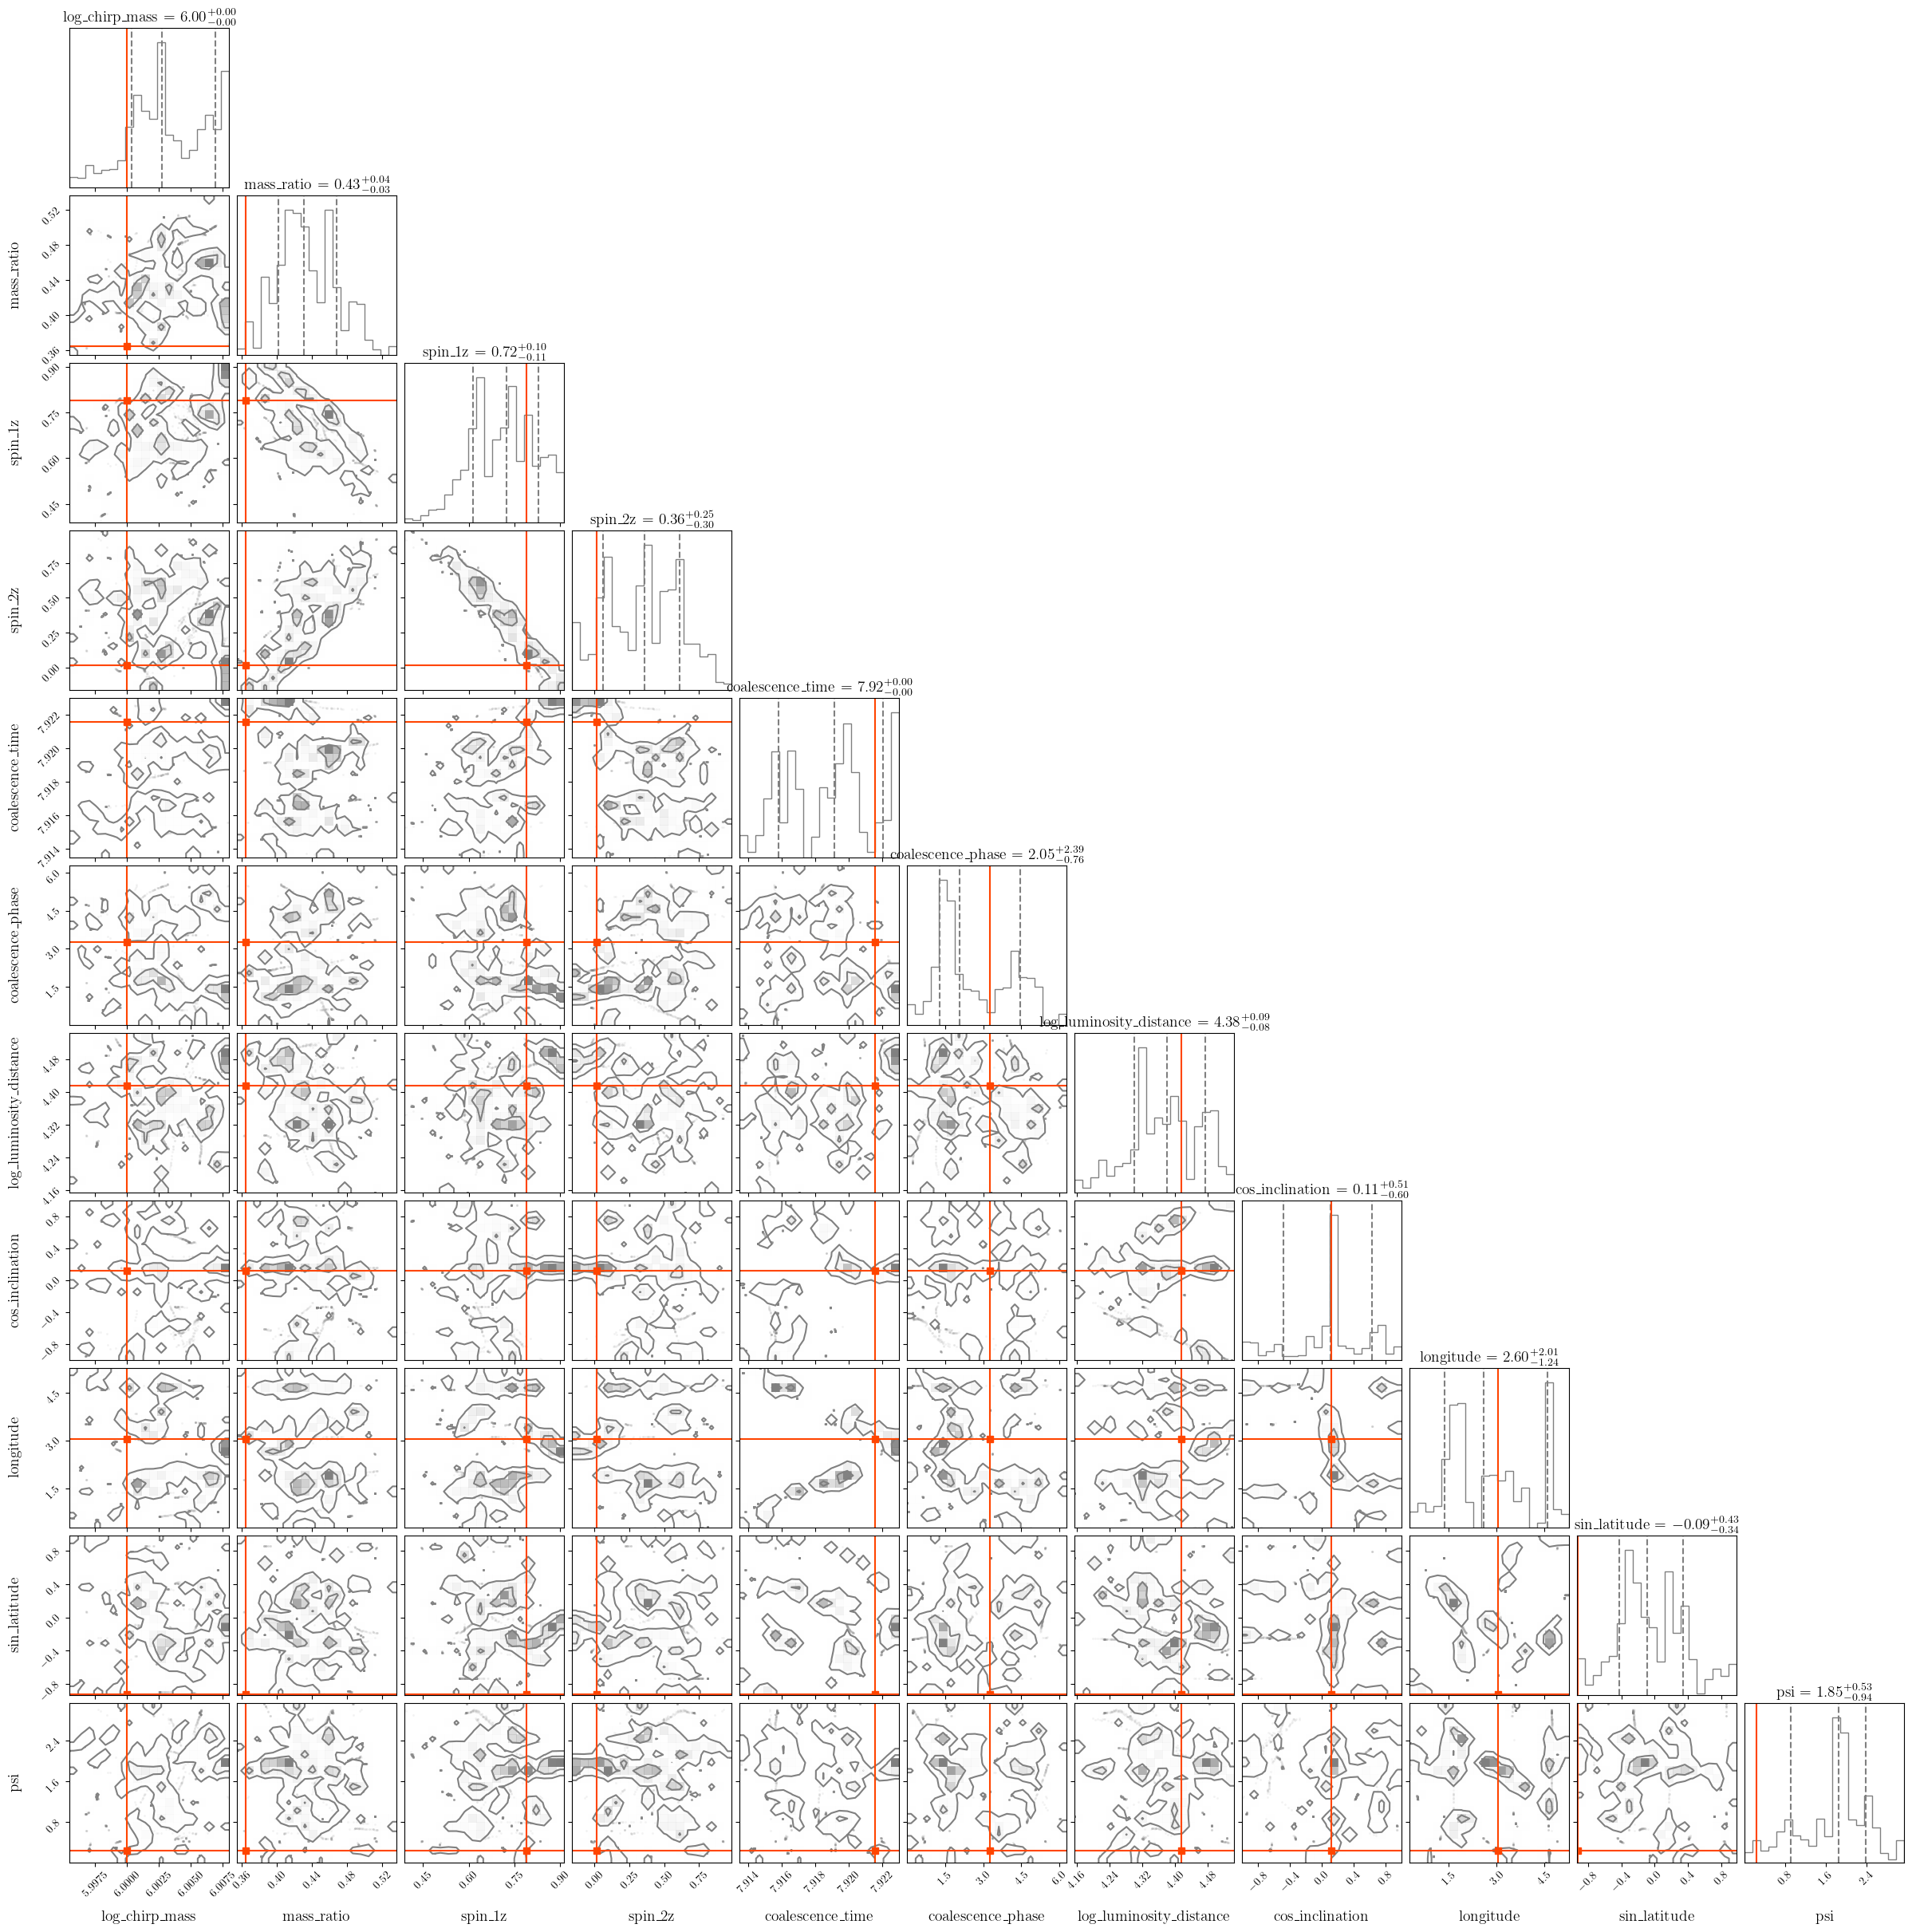

In [19]:
# tau = reader.get_autocorr_time()['model_0'][0]
burnin=1000
thin = 10
print('burnin, thin =', burnin, thin)

samp = reader.get_chain(discard=burnin, thin=thin)['model_0'][:, 0, :, :, :].reshape(-1, ndim)
print('flatten burned sample =', samp.shape)


# corner_range = [[5.771540344811358, 5.773150660454869],
#   [0.44604468622773086, 0.49778304861456835],
#   [-0.3801182851864155, -0.057915714813584485],
#   [0.46100902493817086, 0.99],
#   [69.3411880956013, 69.3515236957991],
#   [0, 6.283185307179586],
#   [3, 6],
#   [-1, 1],
#   [0, 6.283185307179586],
#   [-1, 1],
#   [0, 3.141592653589793]]

mask = [True for _ in range(ndim)]
# mask[5] = False
# mask[10] = False 

# samp = samp[(np.where(np.abs(samp[:, 0] - truths[0]) < 2e-5))[0]]
# samp = samp[(np.where(np.abs(samp[:, 4] - truths[4]) < 5e-3))[0]]
# samp = samp[np.where(samp[:, 4] < 31.0105)[0]]
# samp = samp[np.where(samp[:, 4] > 31.014)[0]]
# samp = samp[np.where(samp[:, 5] < 3.06)[0]]
# samp = samp[np.where(samp[:, 7] < 0)[0]]
# samp = samp[np.where(samp[:, -2] < -0.3)[0]]
# samp = samp[np.where(samp[:, -2] > -0.8)[0]]

samp_masked = samp[:, mask]
label_masked = np.array(labels)[mask]
truth_masked = np.array(truths)[mask]


figure = corner(
    samp_masked, bins=20, color='grey', 
    # range = corner_range,
    # range = [(6.25, 6.31), (0.25, 0.3), (-0.01, 0.01), (-0.01, 0.01), (8.88, 8.92), (0, 2.*np.pi), (4.2, 4.5), (0.4, 0.45), (0, 2. * np.pi), (0, 1), (0, 1)], 
    labels=label_masked, label_kwargs={'fontsize': 14}, 
    truths=truth_masked, truth_color='orangered', 
    quantiles=[0.16, 0.5, 0.84],
    levels=(1-np.exp(-0.5), 1-np.exp(-2.)), # area in contour, corresponding to 1sigma and 2sigma of the parameter
    # fill_contours=False,
    # no_fill_contours=True,
    show_titles=True, title_kwargs={'fontsize':14},
    smooth=0.5,
    );
print('final sample size = ', samp_masked.shape)
# plt.savefig('MCMCResults/TDC2_'+datatag+'_corner.pdf')

# chain_dict = {
#     "labels": label_masked, 
#     "truths": truth_masked, 
#     "samples": samp_masked,
# }
# import pickle 
# with open("MCMCResults/TDC2_"+datatag+"_chains.pkl", "wb") as chain_file:
#     pickle.dump(chain_dict, chain_file)